**PIZZA SALES ANALYSIS**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('pizza_sales.csv')
data

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
data.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [4]:
data.shape

(48620, 12)

In [5]:
data.isna().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

**% of Sales by Pizza Category**

In [6]:
data['total_price'] = pd.to_numeric(data['total_price'], errors='coerce')

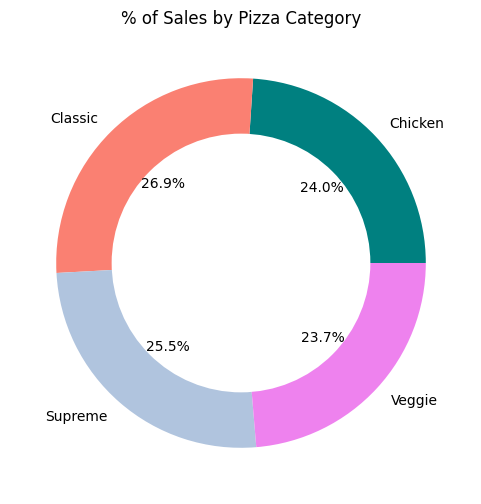

In [42]:


category_sales = data.groupby('pizza_category')['total_price'].sum()


colors=['teal','salmon','lightsteelblue','violet']
plt.pie(category_sales ,labels= category_sales.index, colors=colors , autopct='%1.1f%%')
donut = plt.Circle ((0,0), 0.70, fc='white')

fig = plt.gcf()
fig.gca().add_artist(donut)
fig.set_size_inches(6,6)
plt.title('% of Sales by Pizza Category')
plt.show()

**% of Sales by Pizza Size**

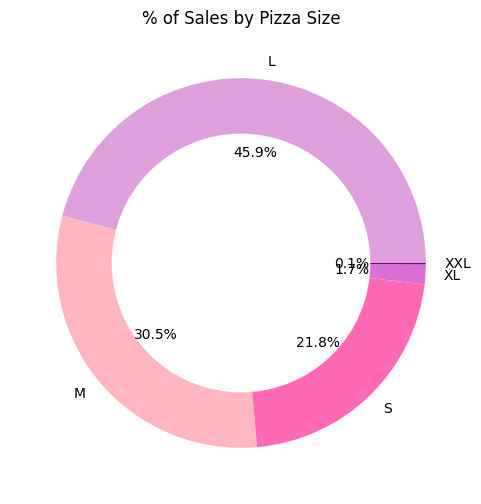

In [41]:
piza_size = data.groupby ('pizza_size')['total_price'].sum()

colors= ['plum','lightpink','hotpink' , 'orchid', 'purple']
plt.pie(piza_size , labels = piza_size.index, colors= colors, autopct = '%1.1f%%')
donut= plt.Circle((0,0),0.70, fc='white')
fig= plt.gcf()
fig.gca().add_artist(donut)
fig.set_size_inches(6,6)
plt.title('% of Sales by Pizza Size')
plt.show()

**Daily Trend for Total Orders**

In [9]:
data['order_date'] = pd.to_datetime(data['order_date'], dayfirst=True, errors='coerce')

In [10]:
data['order_date'].isnull().sum()

np.int64(0)

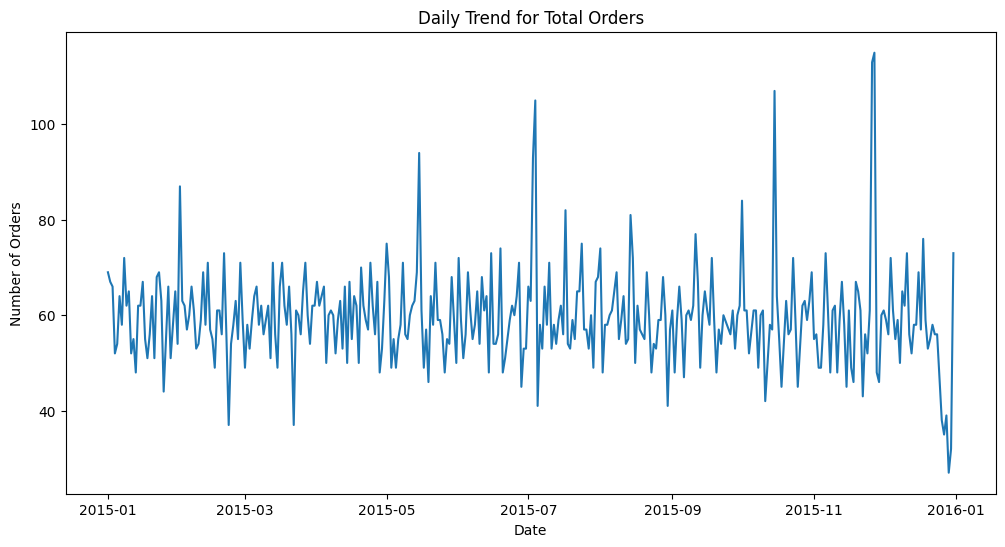

In [38]:
daily_orders = data.groupby('order_date')['order_id'].nunique()
plt.figure(figsize=(12,6))
plt.plot(daily_orders.index, daily_orders.values )

plt.title('Daily Trend for Total Orders')
plt.xlabel('Date')
plt.ylabel ('Number of Orders')


plt.show()

**Hourly Trends for Total Orders**

In [25]:
# Convert order_time to datetime (if it's not already)
data['order_time'] = pd.to_datetime(data['order_time'], format='%H:%M:%S', errors='coerce')

# Extract hour
data['order_hour'] = data['order_time'].dt.hour

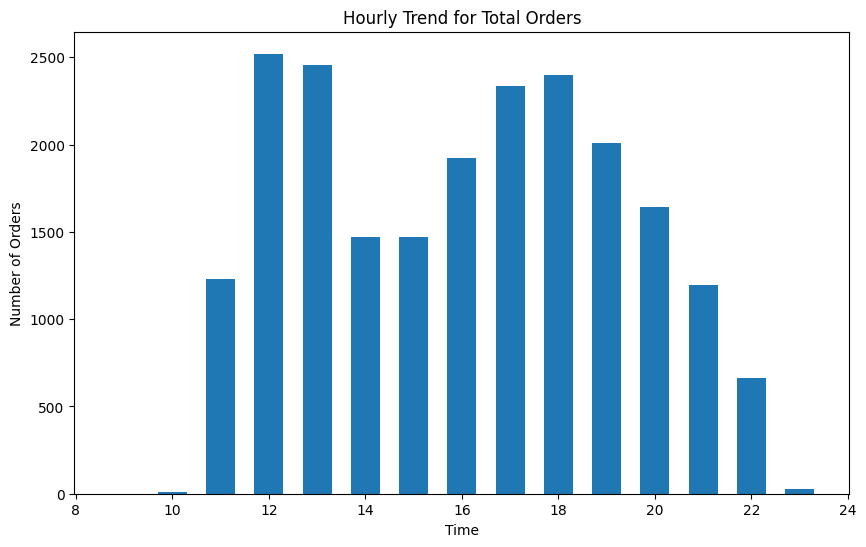

In [39]:
hourly_orders = data.groupby('order_hour')['order_id'].nunique()
plt.figure(figsize=(10,6))
plt.bar(hourly_orders.index, hourly_orders.values, width = 0.6)
plt.title('Hourly Trend for Total Orders')
plt.xlabel('Time')
plt.ylabel('Number of Orders')
plt.show()

**Top 5 Best-Selling Pizza per Category**

C:\Users\Anmol\AppData\Local\Temp\ipykernel_19260\504241054.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5_per_category = grouped.groupby('pizza_category', group_keys=False).apply(


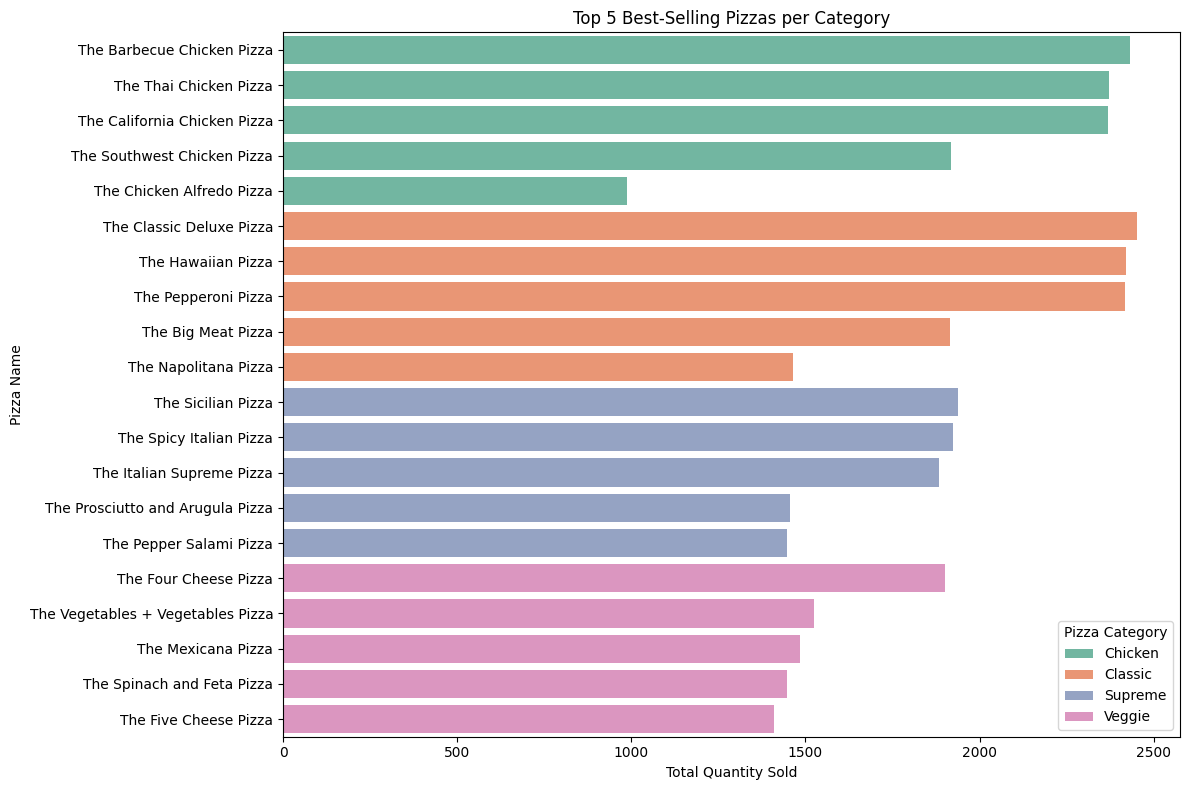

In [40]:
grouped = data.groupby(['pizza_category', 'pizza_name'])['quantity'].sum().reset_index()


top5_per_category = grouped.groupby('pizza_category', group_keys=False).apply(
    lambda x: x.sort_values('quantity', ascending=False).head(5))


plt.figure(figsize=(12,8))
sns.barplot(data=top5_per_category, x='quantity', y='pizza_name', hue='pizza_category', dodge=False, palette='Set2')

plt.title('Top 5 Best-Selling Pizzas per Category')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Pizza Name')
plt.legend(title='Pizza Category')
plt.tight_layout()
plt.show()